In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
import pandas as pd
from astropy.table import Table

In [2]:
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS

In [3]:
star = SkyCoord(124.5331098906583, -68.3147968132493, frame='icrs', unit='deg')

In [4]:
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)
utcoffset = -4*u.hour  # Eastern Daylight Time
time = Time('2012-7-12 23:00:00') - utcoffset

In [5]:
midnight = Time('2012-7-13 00:00:00') - utcoffset
delta_midnight = np.linspace(-2, 10, 100)*u.hour
frame_July13night = AltAz(obstime=midnight+delta_midnight,
                          location=bear_mountain)
staraltazs_July13night = star.transform_to(frame_July13night)

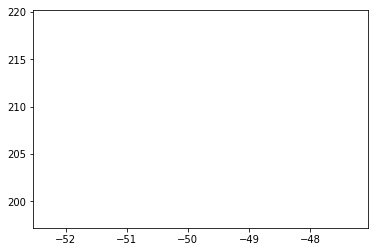

In [6]:
plt.plot(staraltazs_July13night[0].alt.value, staraltazs_July13night[0].az.value)

In [7]:
stars = pd.read_csv('/home/tom/Downloads/asu.tsv', sep=';', comment='#',)


In [8]:
tale = Table.read('/home/tom/Downloads/vizier_votable.vot', format='votable')
yale = SkyCoord(tale['_RAJ2000'], tale['_DEJ2000'], frame='icrs', unit='deg')

/home/tom/anaconda3/envs/exoplanet/lib/python3.7/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/home/tom/anaconda3/envs/exoplanet/lib/python3.7/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/home/tom/anaconda3/envs/exoplanet/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/home/tom/anaconda3/envs/exoplanet/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):


In [64]:
galaxy = SkyCoord(np.arange(0,360,1), np.zeros(360), frame='galactic', unit='deg')

In [65]:
waimea = EarthLocation(lat=20.020278*u.deg, lon=-155.667778*u.deg)
northpole =  EarthLocation(lat=-90*u.deg, lon=0*u.deg)
silver = EarthLocation(lat=32.778056*u.deg, lon=-108.274167*u.deg)
sesme = EarthLocation(lat=-0.502492*u.deg, lon=-80.03313867*u.deg)

In [66]:
# utcoffset = -10*u.hour  # Hawaii
# utcoffset = -10.5*u.hour  # nothing
utcoffset = -5*u.hour

In [67]:
time = Time('1900-7-21 12:00:00') - utcoffset
# time = Time('1773-6-6 03:00:00') - utcoffset
# time = Time('1973-6-6 03:00:00') - utcoffset
time = Time('2019-01-01 00:00:00') - utcoffset
time = Time('2000-06-01 12:00:00') - utcoffset

In [68]:
frame = AltAz(obstime=time,
                          location=sesme)

In [69]:
staraltaz = yale.transform_to(frame)
galaltaz = galaxy.transform_to(frame)

/home/tom/anaconda3/envs/exoplanet/lib/python3.7/site-packages/astropy/_erfa/core.py:4284: RuntimeWarning: invalid value encountered in ld
  p1 = ufunc.ld(bm, p, q, e, em, dlim)
/home/tom/anaconda3/envs/exoplanet/lib/python3.7/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/home/tom/anaconda3/envs/exoplanet/lib/python3.7/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/home/tom/anaconda3/envs/exoplanet/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/home/tom/anaconda3/envs/exoplanet/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in

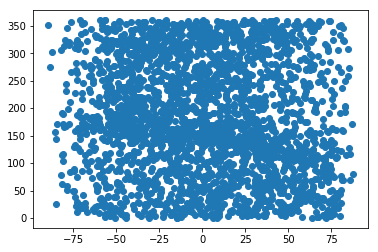

In [70]:
plt.scatter(staraltaz.alt.value, staraltaz.az.value)

In [71]:
import cartopy.crs as ccrs

In [72]:
q = np.array(tale['Vmag'].tolist())

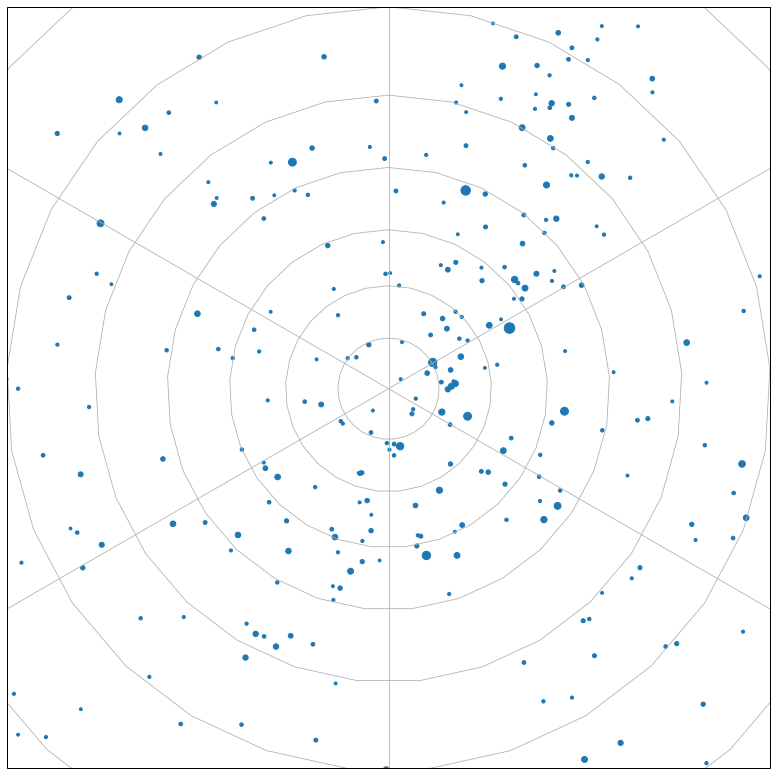

In [73]:
fig = plt.figure(figsize=[14, 14])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
ax.scatter(staraltaz.az.value[q<4], staraltaz.alt.value[q<4],
                  s=(-(q[q<4]-6))**2 * 2, alpha=1, transform=ccrs.Geodetic(), rasterized=True)
ax.set_extent([-180, 180, 90, -0], ccrs.PlateCarree())
ax.gridlines()

fig.savefig('testtom.png')

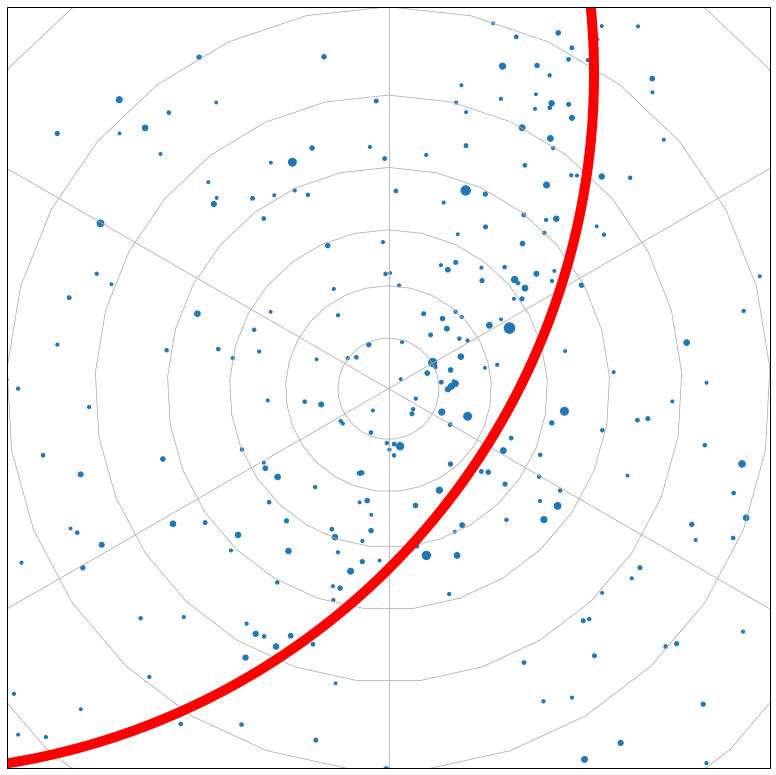

In [78]:
fig = plt.figure(figsize=[14, 14])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
ax.scatter(staraltaz.az.value[q<4], staraltaz.alt.value[q<4],
                  s=(-(q[q<4]-6))**2 * 2, alpha=1, transform=ccrs.Geodetic(), rasterized=True)
ax.set_extent([-180, 180, 90, -0], ccrs.PlateCarree())
ax.gridlines()

ax.plot(galaltaz.az.value, galaltaz.alt.value,
                  alpha=1, transform=ccrs.Geodetic(), color='red', lw=10)

fig.savefig('testtom.png')

In [54]:
q.tolist()

[4.78000020980835,
 5.130000114440918,
 4.369999885559082,
 5.039999961853027,
 4.550000190734863,
 4.989999771118164,
 4.610000133514404,
 2.069999933242798,
 2.2799999713897705,
 5.420000076293945,
 3.880000114440918,
 5.289999961853027,
 5.010000228881836,
 4.889999866485596,
 5.409999847412109,
 5.239999771118164,
 5.289999961853027,
 2.8299999237060547,
 5.130000114440918,
 4.789999961853027,
 4.440000057220459,
 4.610000133514404,
 4.510000228881836,
 3.559999942779541,
 4.230000019073486,
 5.380000114440918,
 5.159999847412109,
 5.179999828338623,
 5.380000114440918,
 2.819999933242798,
 3.930000066757202,
 2.4000000953674316,
 4.860000133514404,
 5.010000228881836,
 5.179999828338623,
 5.420000076293945,
 5.199999809265137,
 5.170000076293945,
 4.760000228881836,
 4.360000133514404,
 4.53000020980835,
 4.739999771118164,
 5.380000114440918,
 5.070000171661377,
 4.170000076293945,
 5.199999809265137,
 5.079999923706055,
 5.139999866485596,
 4.340000152587891,
 3.690000057220459,

array(['000.3987655417', '000.4560351217', '000.4900789996', ...,
       '359.7522472857', '359.8278734581', '359.9790778197'], dtype=object)

TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'Unit'

array(['000.3987655417', '000.4560351217', '000.4900789996', ...,
       '359.7522472857', '359.8278734581', '359.9790778197'], dtype='<U14')

In [115]:
-(q-6)/8

array([0.15249997, 0.10874999, 0.20375001, ..., 0.13999999, 0.24624997,
       0.18875003])